#  Project 1 - Bee Subspecie Classification (logistic regression vs neural network approach) 

### Import relevant libraries

In [2]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
#to load matlab mat files
from scipy.io import loadmat

size = 50

## PART 1.1: Create csv with relevant data from original file

In [ ]:
relevant_columns = ['file', 'subspecies']
ds = pd.read_csv('bee_dataset/bee_data.csv', usecols=relevant_columns)
#for img in ds:
    #print(img)
ds.to_csv('bee_dataset/relevant_bee_data.csv', index=False)

## PART 1.2: Visualize relevant data

In [ ]:
df = pd.read_csv('bee_dataset/relevant_bee_data.csv')
tmp = df['subspecies'].value_counts()
df = pd.DataFrame(data={'subspecie': tmp.index, 'Image Count': tmp.values})
df
fig = px.bar(df, x='subspecie', y='Image Count')
fig.show()


In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
img_heights = []
img_widths = []
for idx,file in enumerate(ds['file']):
    img_array = cv2.imread('bee_dataset/bee_imgs/'+file, cv2.IMREAD_GRAYSCALE)
    h,w = img_array.shape
    img_heights.append(h)
    img_widths.append(w)
plt.xlabel('Image width')
plt.ylabel("Image height")
plt.scatter(img_widths,img_heights,c="r",marker="x",label="Positive examples")

## PART 1.3: Transform relevant data to features and classes

In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
max_width = 0
max_height = 0
imgs_array = []
imgs_subspecies_array = []
for idx,file in enumerate(ds['file']):
    img_array = cv2.imread('bee_dataset/bee_imgs/'+file, cv2.IMREAD_GRAYSCALE)
    h,w = img_array.shape
    if h > max_height:
        max_height = h
    if w > max_width:
        max_width = w
    print(img_array)
    flat_img_array = img_array.ravel()
    print(flat_img_array)
    imgs_array.append(flat_img_array)
    imgs_subspecies_array.append(ds['subspecies'][idx])
data = {'features': imgs_array, 'class': imgs_subspecies_array}
df = pd.DataFrame(data=data, columns=['features', 'class'])
#print(df)
df.to_csv('bee_dataset/ml_data.csv', index=False)

## PART 1.4: Normalize data

In [ ]:
ds = pd.read_csv('bee_dataset/relevant_bee_data.csv')
max_width = 0
max_height = 0
mean_width = 0
mean_height = 0
img_dict = {}
for idx,file in enumerate(ds['file']):
    img_array = cv2.imread('bee_dataset/bee_imgs/'+file, cv2.IMREAD_GRAYSCALE)
    h,w = img_array.shape
    mean_height += h
    mean_width += w
    if h > max_height:
        max_height = h
    if w > max_width:
        max_width = w
    if h <= size and w <= size: 
        vector_size = h*w
        flat_img_array = img_array.flatten()
        flat_img_array = np.reshape(flat_img_array,(1,vector_size))
        img_dict[idx] = {'features': flat_img_array, 'subspecie': ds['subspecies'][idx]}

vector_size = size*size
features_array = []
subspecies_array = []
for key, value in img_dict.items():
    features = value['features']
    h,w = features.shape
    if h != max_height or w != max_width:
        size_dif = vector_size-(h*w)
        pad_features = np.pad(features, ((0,0),(0,size_dif)), mode='constant', constant_values=0)
    pad_features = pad_features.flatten()
    pad_features = ' '.join(map(str, pad_features))
    features_array.append(pad_features)
    subspecies_array.append(ds['subspecies'][key])
        
#data = {'features': features_array, 'class': subspecies_array}
#df = pd.DataFrame(data=data, columns=['features', 'class'])
#df.to_csv('bee_dataset/ml_data.csv', index=False)

## PART 2: Load data

In [3]:
ds = pd.read_csv('bee_dataset/ml_data.csv')
features=ds['features']
y=ds['class']
n_examples = features.shape[0]
feature_size = size*size
X = np.empty((n_examples,feature_size), int)
for idx,f in enumerate(features):
        arr_f = np.fromstring(f, dtype=int, sep=' ')
        arr_f = np.reshape(arr_f, (1,arr_f.shape[0]))
        X[idx,:] = np.copy(arr_f)
#X = np.copy(arr)

508


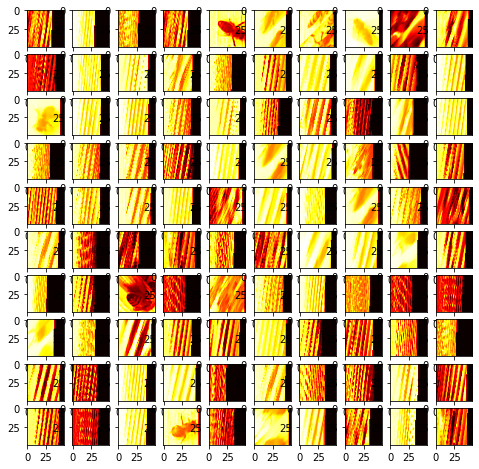

In [5]:
print(n_examples)
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
                                                        #reshape back to 20x20 pixel image
        axis[i,j].imshow(X[np.random.randint(0,n_examples),:].reshape(size,size,order="F"), cmap="hot") 

In [ ]:
df = pd.read_csv('bee_dataset/ml_data.csv')
tmp = df['class'].value_counts()
df = pd.DataFrame(data={'class': tmp.index, 'Image Count': tmp.values})
df
fig = px.bar(df, x='class', y='Image Count')
fig.show()